In [1]:
import cv2

cap = cv2.VideoCapture(0)
cap.set(3, 640) #WIDTH
cap.set(4, 480) #HEIGHT

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')


In [2]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

KeyboardInterrupt: 

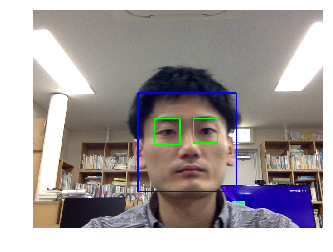

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()
fig.show()
fig.canvas.draw()


while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    #print(len(faces))
    # Display the resulting frame
    for (x,y,w,h) in faces:
         cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
         roi_gray = gray[y:y+h, x:x+w]
         roi_color = frame[y:y+h, x:x+w]
         eyes = eye_cascade.detectMultiScale(roi_gray)
         for (ex,ey,ew,eh) in eyes:
             cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

    ax.grid(False)
    plt.axis('off')
    clear_output(wait = True)
    ax.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    display(fig)
    ax.clear()